In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.optimize as opt  
import os 

from markowitz import MaxSharpe

%load_ext autoreload 
%autoreload 2

source 

https://docs.mosek.com/portfolio-cookbook/markowitz.html#equation-doc-eq-markowitz-utility-unconstr

# On simule des returns

In [2]:
def generate_multivariate_normal_returns(
    n_obs: int,
    annual_means: np.ndarray,
    annual_sigmas: np.ndarray,
    correlation_matrix: np.ndarray
) -> np.ndarray:
    """
    truc rapide pour simuler des returns 
    """
    annual_means = np.array(annual_means, dtype=float)
    annual_sigmas = np.array(annual_sigmas, dtype=float)
    correlation_matrix = np.array(correlation_matrix, dtype=float)

    n_assets = len(annual_means)
    if correlation_matrix.shape != (n_assets, n_assets):
        raise ValueError(f"La matrice de corrélation doit être de taille ({n_assets}, {n_assets}).")

    # Conversion annualisé => journalier
    daily_means = annual_means / 252.0
    daily_sigmas = annual_sigmas / np.sqrt(252.0)

    # Construction de la matrice de covariance
    cov_matrix = np.zeros((n_assets, n_assets))
    for i in range(n_assets):
        for j in range(n_assets):
            cov_matrix[i, j] = correlation_matrix[i, j] * daily_sigmas[i] * daily_sigmas[j]

    # Génération des données
    returns = np.random.multivariate_normal(mean=daily_means, cov=cov_matrix, size=n_obs)
    return returns

In [3]:
def sharpe_ratio(returns, ann=True):
    sharpe = (np.mean(returns) / np.std(returns)) 
    if ann:
        sharpe *= np.sqrt(252)
    return sharpe

# On a une classe qui gère l'optimisation sur les fenêtres 

on contrôle le batch size et l'ecart entre les entrainements (overlap)

In [4]:
def plot_portfolio_results(returns, batch_size, overlap, risk_aversion=1, max_sharpe=True, perm=False, figsize=(15, 3), savefig=True) -> None:
    """
    Affiche deux graphiques :
    0) Les poids
    1) La série de rendements du portefeuille
    2) La performance cumulée
    """

    model = MaxSharpe(risk_aversion=risk_aversion, batch_size=batch_size, overlap=overlap, max_sharpe=max_sharpe)
    if perm :
        model.train_with_permutations(returns)
    else : 
        model.train(returns)
    portfolio_returns = model.simulate_rets_portfolio(returns)

    # Graphique 0 : poids

    plt.figure(figsize=figsize)
    plt.subplot(131)
    plt.plot(model.weights)
    plt.title("Poids des actifs")
    plt.xlabel("Jour")
    plt.ylabel("Rendement")

    # Graphique 1 : rendements journaliers
    
    plt.subplot(132)
    plt.plot(portfolio_returns)
    plt.title("Rendements journaliers du portefeuille")
    plt.xlabel("Jour")
    plt.ylabel("Rendement")

    # Graphique 2 : performance cumulée
    plt.subplot(133)
    plt.plot(np.cumprod(portfolio_returns + 1))
    plt.title("Performance cumulée du portefeuille")
    plt.xlabel("Jour")
    plt.ylabel("Cumul (base 1.0)")

    plt.show()

    # # sauvegarder l'image 
    # save_dir = "charts"
    # os.makedirs(save_dir, exist_ok=True) 
    # file_name = f"Markowitz opt parameters ra_{risk_aversion} bs_{batch_size} ov_{overlap} ms_{max_sharpe}.png"
    # file_name = os.path.join(save_dir, file_name)
    # plt.savefig(file_name)

    sharpe = (np.mean(portfolio_returns) / np.std(portfolio_returns)) * np.sqrt(252)
    print("sharpe ratio", sharpe)
    return sharpe

# Exemple numérique 

In [5]:
np.random.seed(42)

# Simulation et calcul des poids 

In [6]:
batch_size = 200
overlap = 1 
n_obs = 2_000
annual_means = [0.15, 0.30, 0.10]
annual_sigmas = [0.20, 0.70, 0.25]
corr_matrix = np.array([
    [1.0,  -0.7,  0.2 ],
    [-0.7,  1.0, -0.1 ],
    [0.2,  -0.1,  1.0 ]
])

returns = generate_multivariate_normal_returns(
    n_obs, annual_means, annual_sigmas, corr_matrix
)



prix des assets simulés 

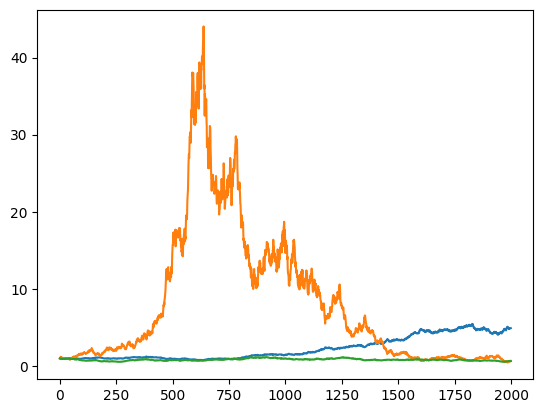

In [7]:
plt.plot(np.cumprod((1 + returns), axis=0))
plt.show()

# rendements du portefeulle optimal selon les différents paramètres 

PLOT #1


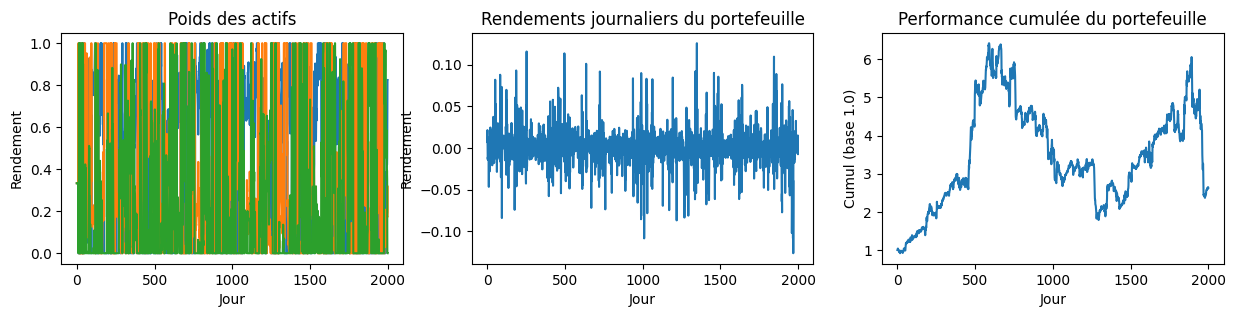

sharpe ratio 0.5224189822985771
parameters : 
 -risk aversion : 0.5 
 -batch size : 10 
 -overlap : 1 
 -max sharpe : True
----------
PLOT #2


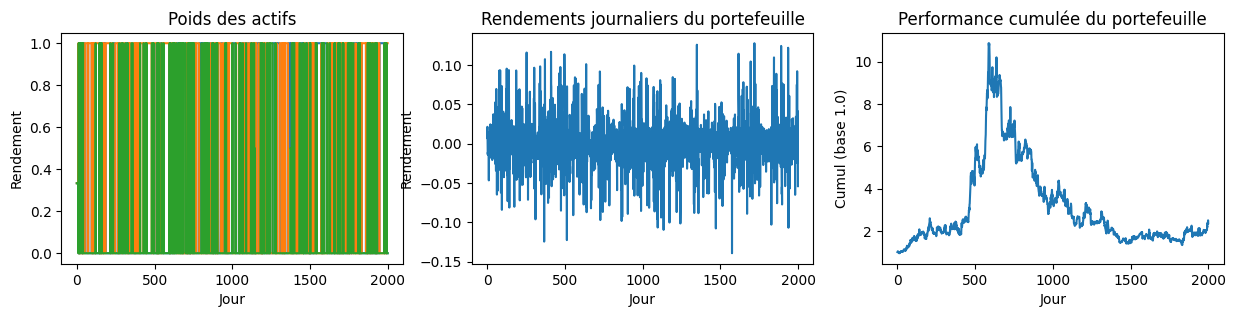

sharpe ratio 0.4680959285564065
parameters : 
 -risk aversion : 0.5 
 -batch size : 10 
 -overlap : 1 
 -max sharpe : False
----------
PLOT #3


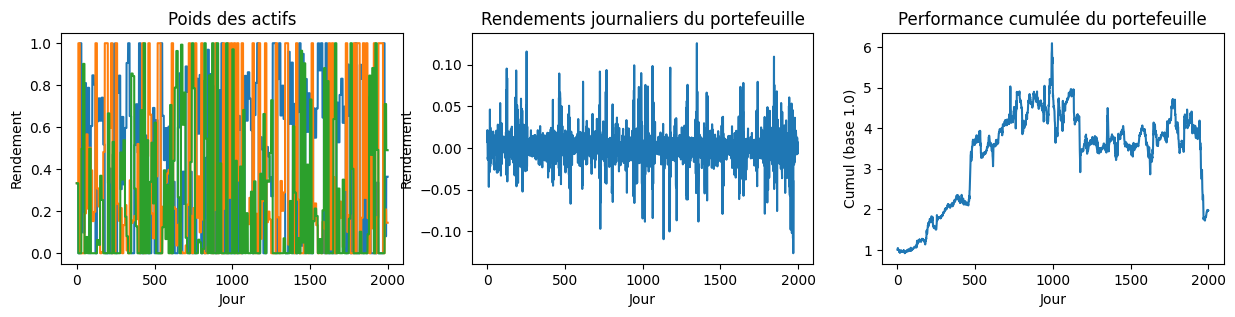

sharpe ratio 0.41810510533336326
parameters : 
 -risk aversion : 0.5 
 -batch size : 10 
 -overlap : 10 
 -max sharpe : True
----------
PLOT #4


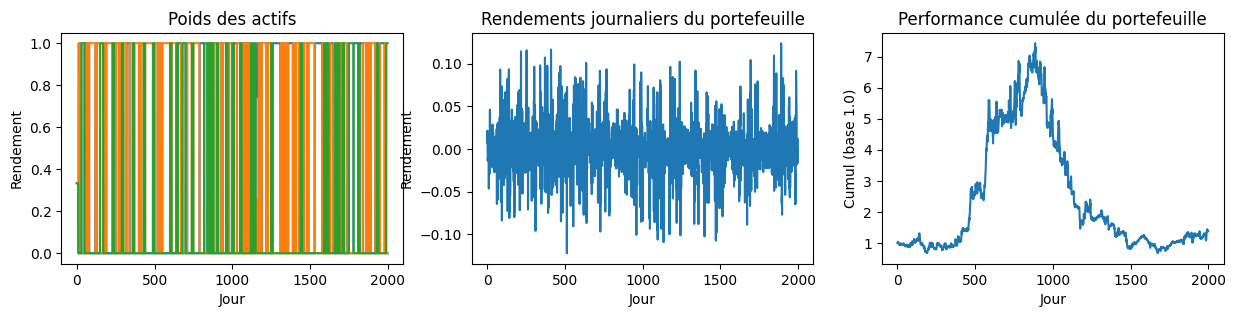

sharpe ratio 0.33201473951394295
parameters : 
 -risk aversion : 0.5 
 -batch size : 10 
 -overlap : 10 
 -max sharpe : False
----------
PLOT #5


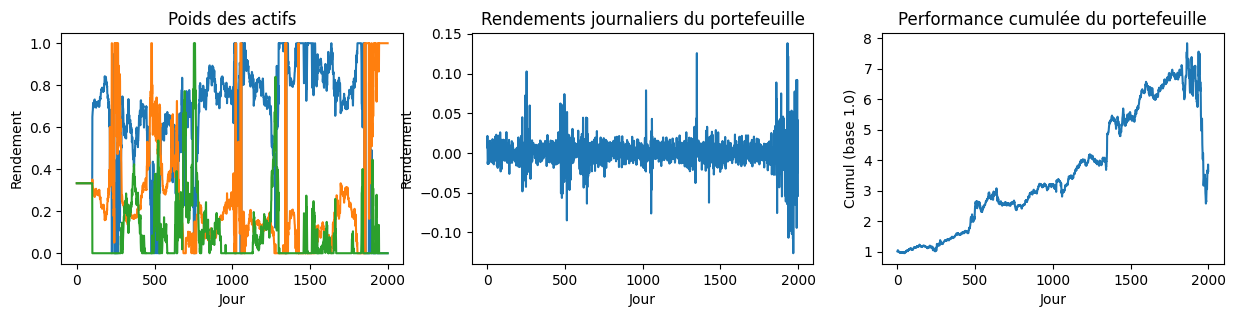

sharpe ratio 0.7215036408869183
parameters : 
 -risk aversion : 0.5 
 -batch size : 100 
 -overlap : 1 
 -max sharpe : True
----------
PLOT #6


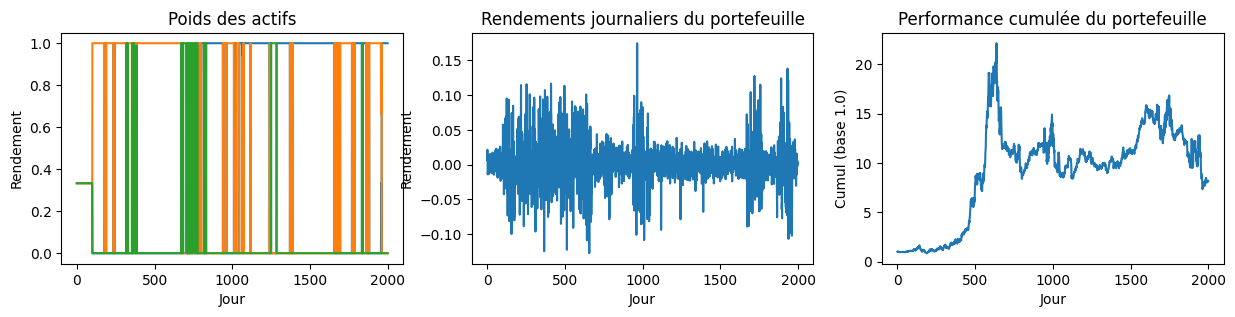

sharpe ratio 0.7839195417597494
parameters : 
 -risk aversion : 0.5 
 -batch size : 100 
 -overlap : 1 
 -max sharpe : False
----------
PLOT #7


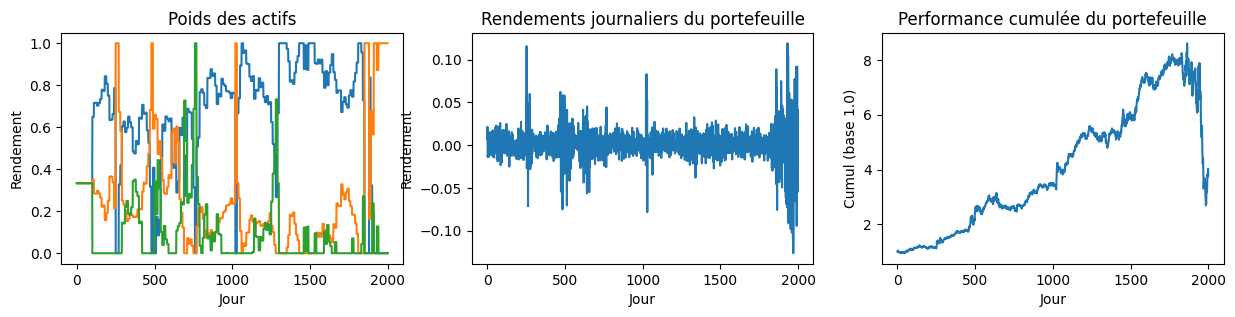

sharpe ratio 0.7513410931302476
parameters : 
 -risk aversion : 0.5 
 -batch size : 100 
 -overlap : 10 
 -max sharpe : True
----------
PLOT #8


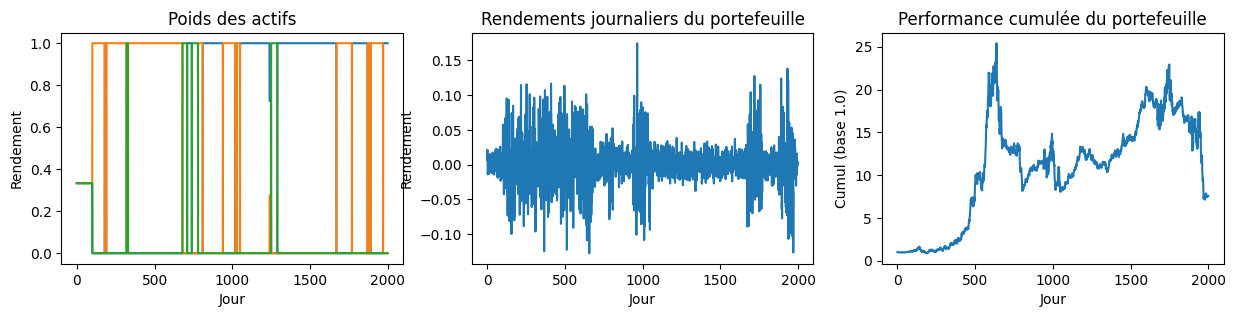

sharpe ratio 0.7622037516630659
parameters : 
 -risk aversion : 0.5 
 -batch size : 100 
 -overlap : 10 
 -max sharpe : False
----------
PLOT #9


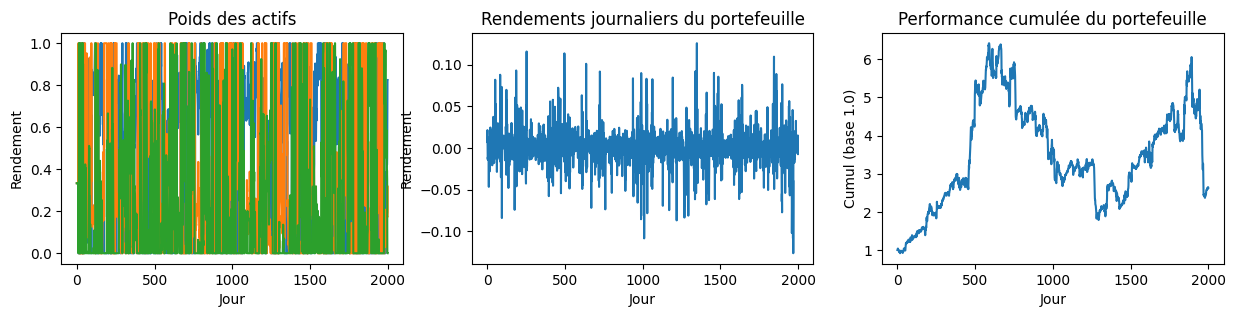

sharpe ratio 0.5224189822985771
parameters : 
 -risk aversion : 1.0 
 -batch size : 10 
 -overlap : 1 
 -max sharpe : True
----------
PLOT #10


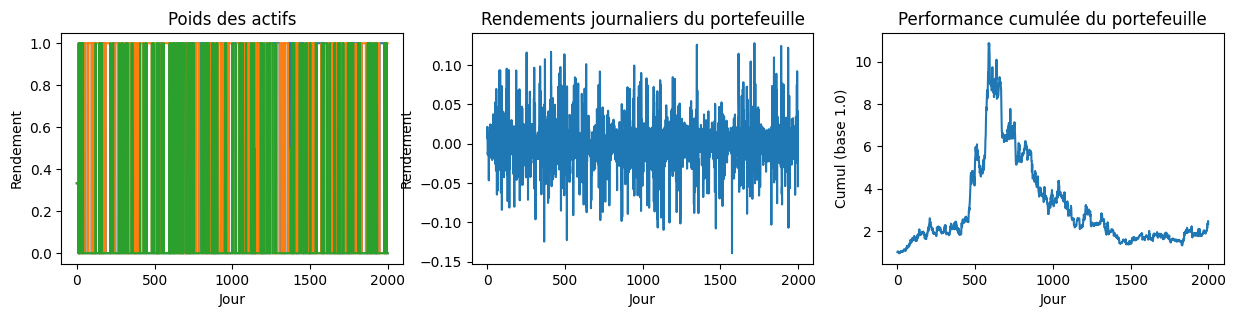

sharpe ratio 0.4647083092779065
parameters : 
 -risk aversion : 1.0 
 -batch size : 10 
 -overlap : 1 
 -max sharpe : False
----------
PLOT #11


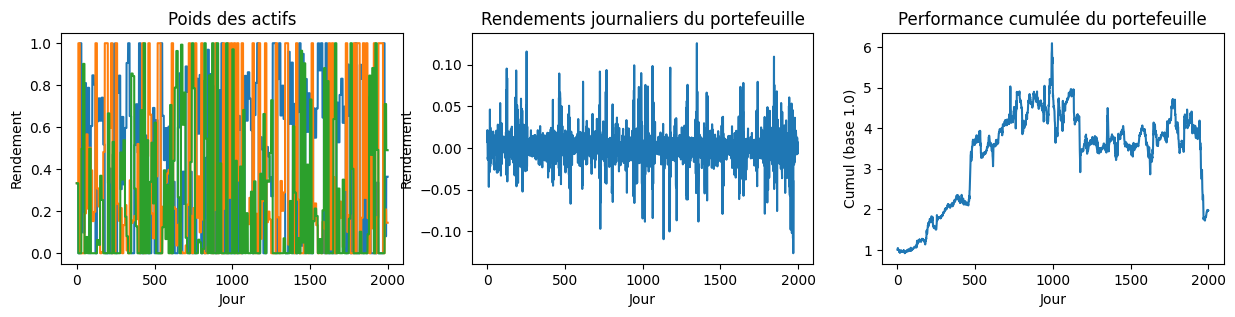

sharpe ratio 0.41810510533336326
parameters : 
 -risk aversion : 1.0 
 -batch size : 10 
 -overlap : 10 
 -max sharpe : True
----------
PLOT #12


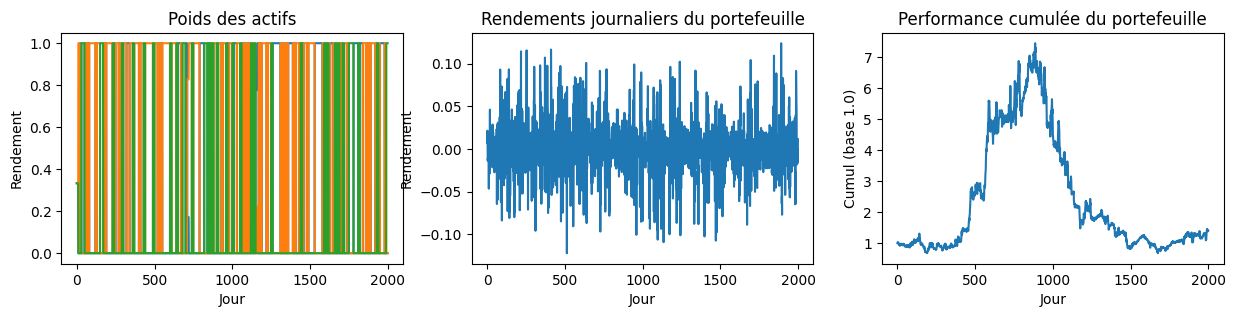

sharpe ratio 0.33502106252808855
parameters : 
 -risk aversion : 1.0 
 -batch size : 10 
 -overlap : 10 
 -max sharpe : False
----------
PLOT #13


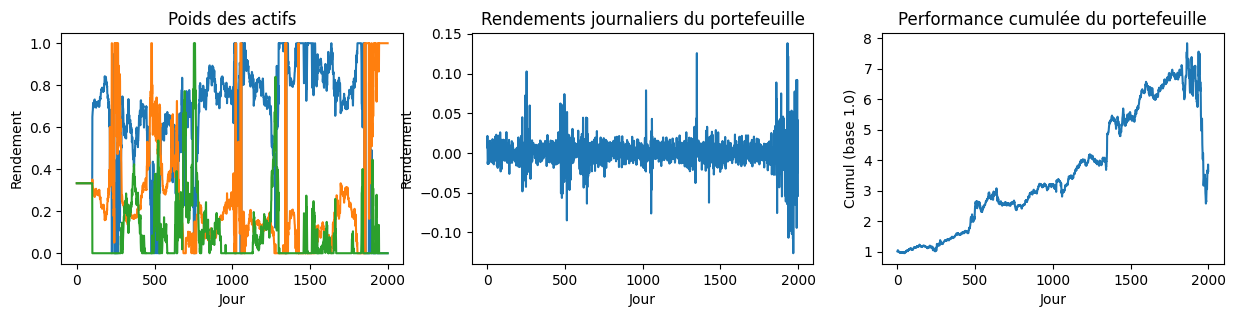

sharpe ratio 0.7215036408869183
parameters : 
 -risk aversion : 1.0 
 -batch size : 100 
 -overlap : 1 
 -max sharpe : True
----------
PLOT #14


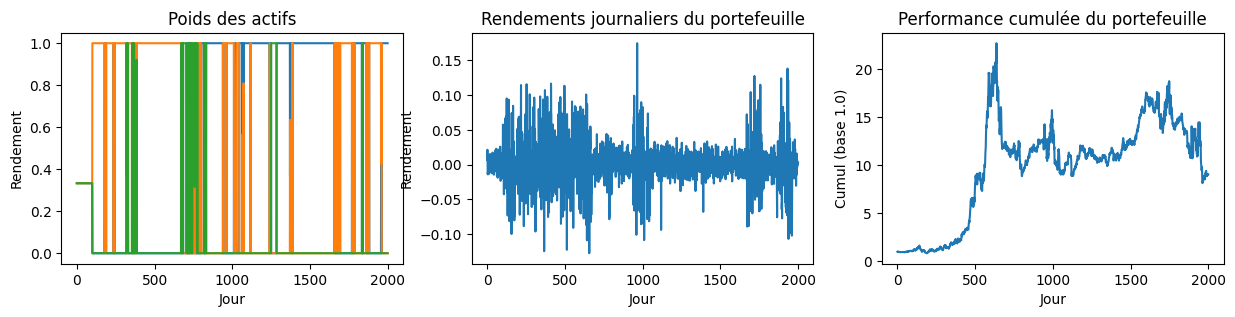

sharpe ratio 0.811756371068143
parameters : 
 -risk aversion : 1.0 
 -batch size : 100 
 -overlap : 1 
 -max sharpe : False
----------
PLOT #15


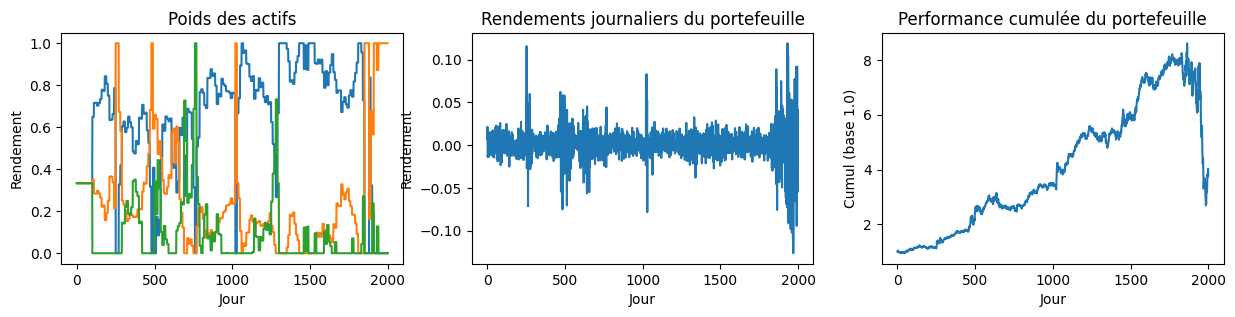

sharpe ratio 0.7513410931302476
parameters : 
 -risk aversion : 1.0 
 -batch size : 100 
 -overlap : 10 
 -max sharpe : True
----------
PLOT #16


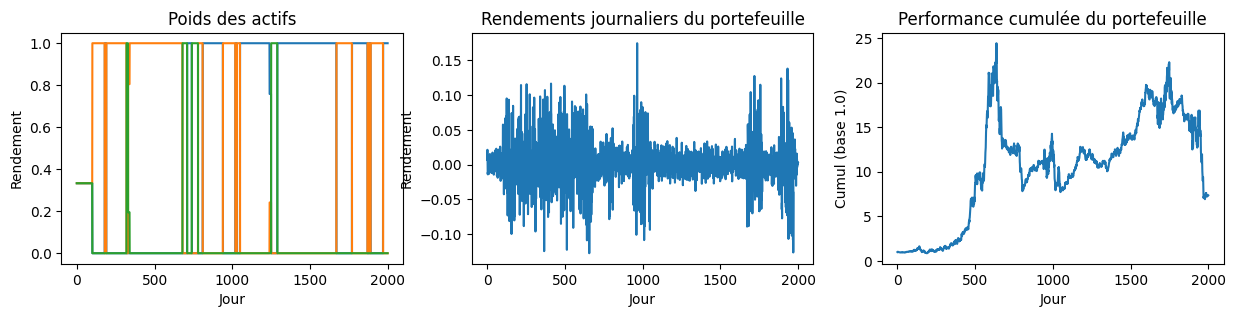

sharpe ratio 0.7554563966621411
parameters : 
 -risk aversion : 1.0 
 -batch size : 100 
 -overlap : 10 
 -max sharpe : False
----------
PLOT #17


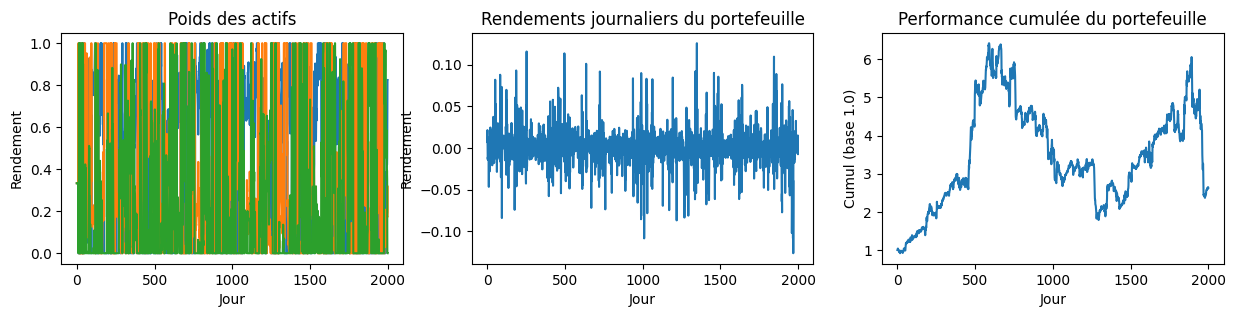

sharpe ratio 0.5224189822985771
parameters : 
 -risk aversion : 2.0 
 -batch size : 10 
 -overlap : 1 
 -max sharpe : True
----------
PLOT #18


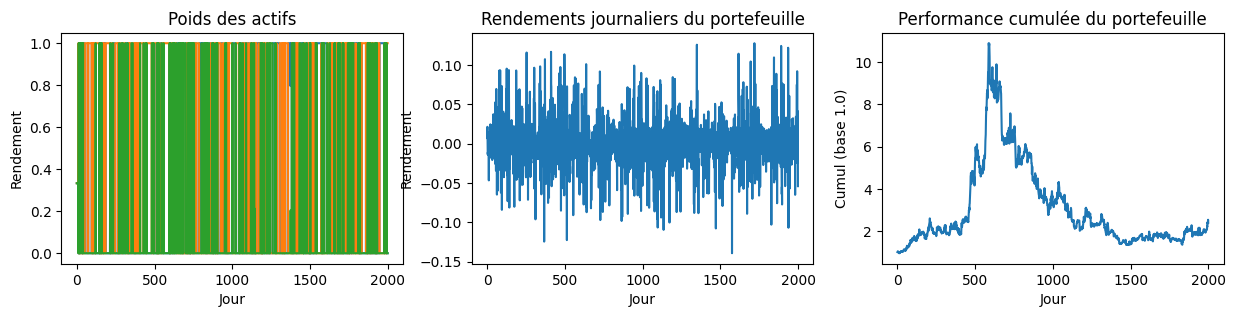

sharpe ratio 0.47099512966462903
parameters : 
 -risk aversion : 2.0 
 -batch size : 10 
 -overlap : 1 
 -max sharpe : False
----------
PLOT #19


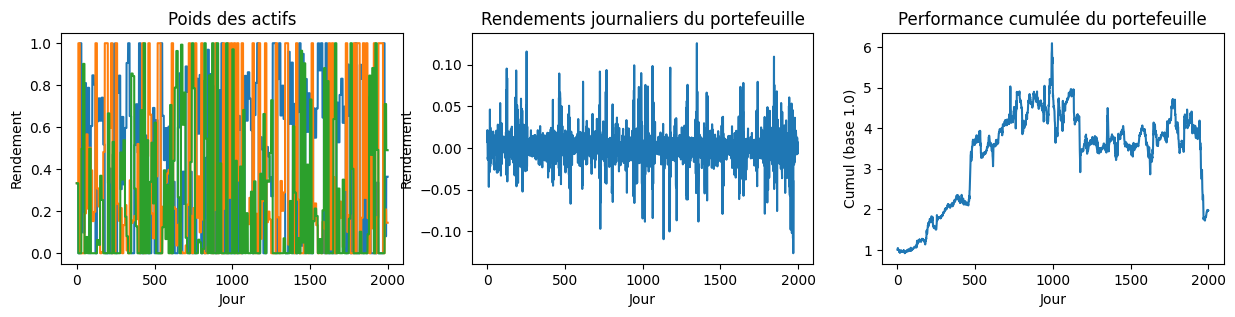

sharpe ratio 0.41810510533336326
parameters : 
 -risk aversion : 2.0 
 -batch size : 10 
 -overlap : 10 
 -max sharpe : True
----------
PLOT #20


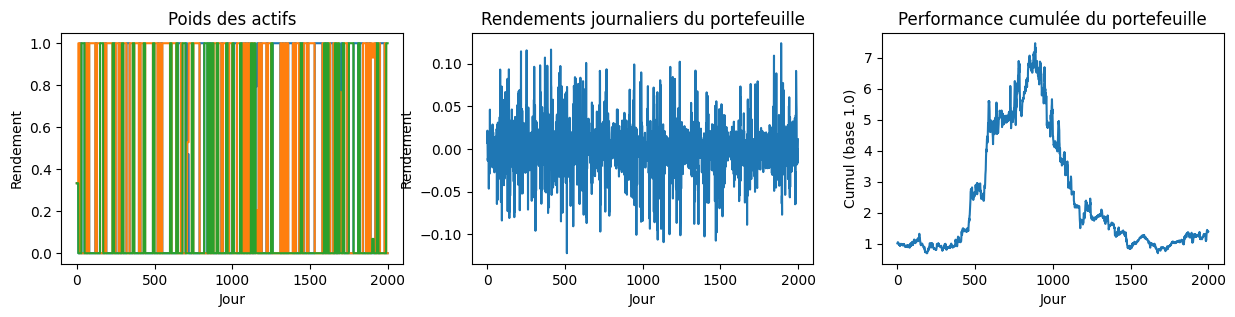

sharpe ratio 0.32974741027123433
parameters : 
 -risk aversion : 2.0 
 -batch size : 10 
 -overlap : 10 
 -max sharpe : False
----------
PLOT #21


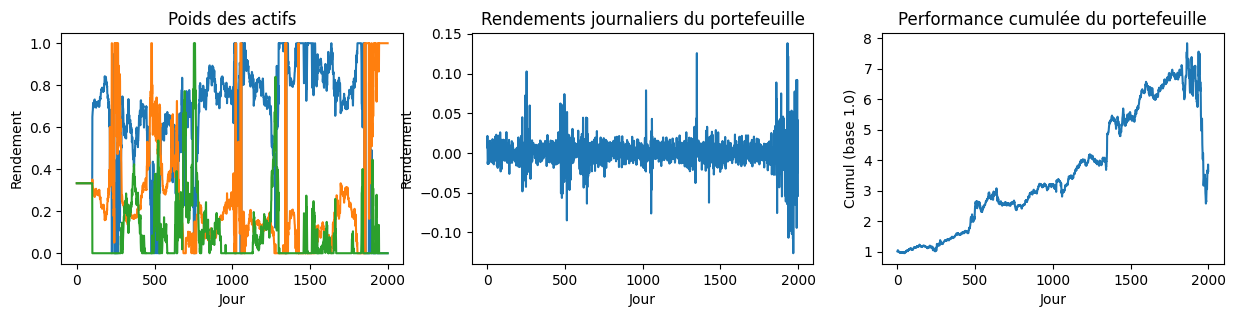

sharpe ratio 0.7215036408869183
parameters : 
 -risk aversion : 2.0 
 -batch size : 100 
 -overlap : 1 
 -max sharpe : True
----------
PLOT #22


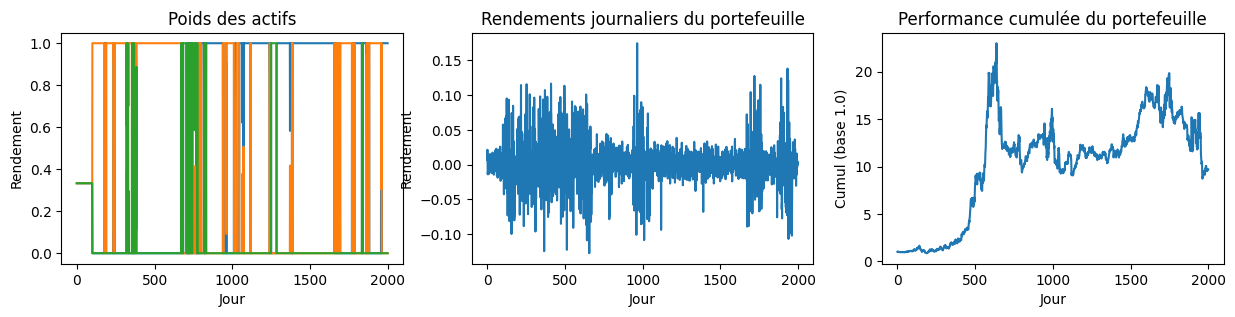

sharpe ratio 0.830720369852017
parameters : 
 -risk aversion : 2.0 
 -batch size : 100 
 -overlap : 1 
 -max sharpe : False
----------
PLOT #23


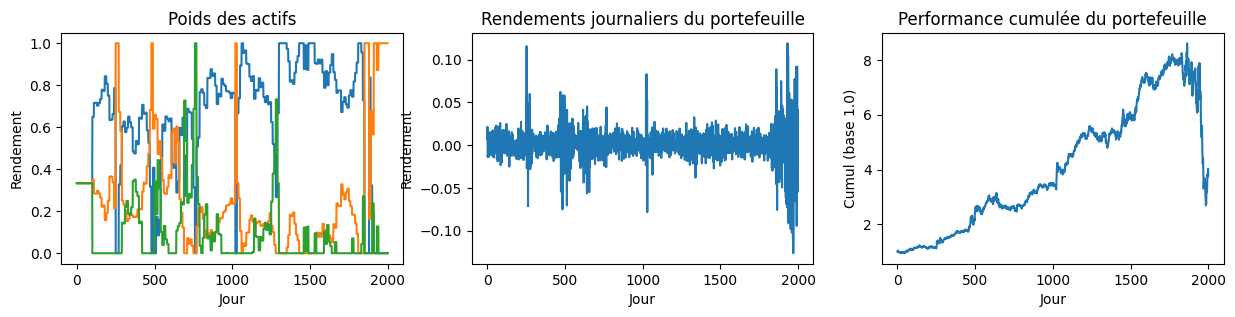

sharpe ratio 0.7513410931302476
parameters : 
 -risk aversion : 2.0 
 -batch size : 100 
 -overlap : 10 
 -max sharpe : True
----------
PLOT #24


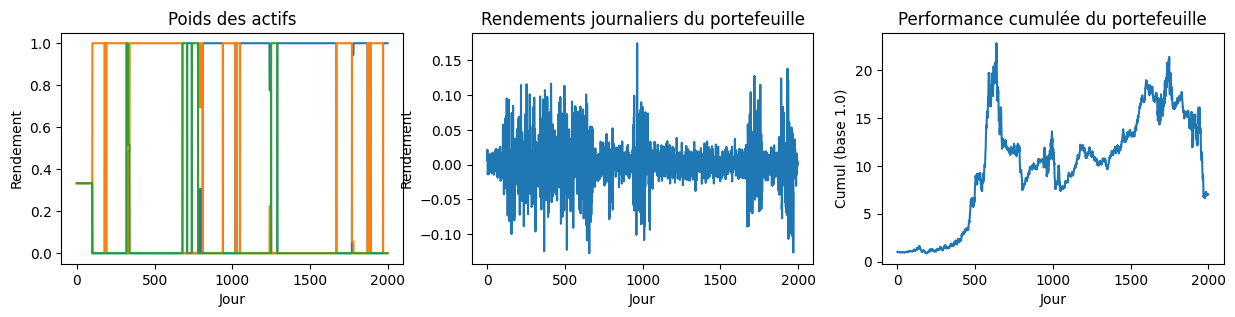

sharpe ratio 0.7445794647505811
parameters : 
 -risk aversion : 2.0 
 -batch size : 100 
 -overlap : 10 
 -max sharpe : False
----------


In [8]:
risk_aversion_list=[0.5, 1.0, 2.0]
batch_size_list=[10, 100]
overlap_list=[1, 10]
max_sharpes=[True, False]

sharpes = list()

i=1 

for risk_aversion in risk_aversion_list:
    for batch_size in batch_size_list:
        for overlap in overlap_list:
            for max_sharpe in max_sharpes : 
                print(f"PLOT #{i}")
                sharpes.append(plot_portfolio_results(returns, risk_aversion=risk_aversion, batch_size=batch_size, overlap=overlap, max_sharpe=max_sharpe))
                print(f"parameters : \n -risk aversion : {risk_aversion} \n -batch size : {batch_size} \n -overlap : {overlap} \n -max sharpe : {max_sharpe}")
                print('-'*10)
                i+=1

# Influence des parametres sur le sharpe 

1:2, 3:4 --> changement d'optimiseur 

1:3 2:4 --> augmentation de l'overlap 

1:5 --> augmentaiton de la batch size 
 

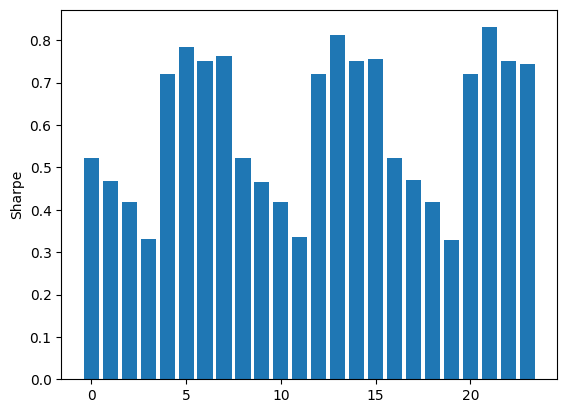

In [9]:
sharpes_arr = np.array(sharpes)
n_ra = len(risk_aversion_list)   
n_bs = len(batch_size_list)      
n_ov = len(overlap_list)         
sharpes_arr = sharpes_arr.reshape(n_ra, n_bs, n_ov, 2)


sharpe_values = sharpes_arr.flatten()
plt.figure()
plt.bar(x=np.arange(len(sharpe_values)), height=sharpe_values)
plt.ylabel("Sharpe")
plt.show()

# Test de la permutation 

In [26]:
np.random.seed(42)

In [27]:
batch_size = 200
overlap = 10 
n_obs = 1_000
annual_means = [0.15, 0.30]
annual_sigmas = [0.20, 0.70]
corr_matrix = np.array([
    [1.0,  -0.7],
    [-0.7,  1.0],
])

returns = generate_multivariate_normal_returns(
    n_obs, annual_means, annual_sigmas, corr_matrix
)

overlap : 1



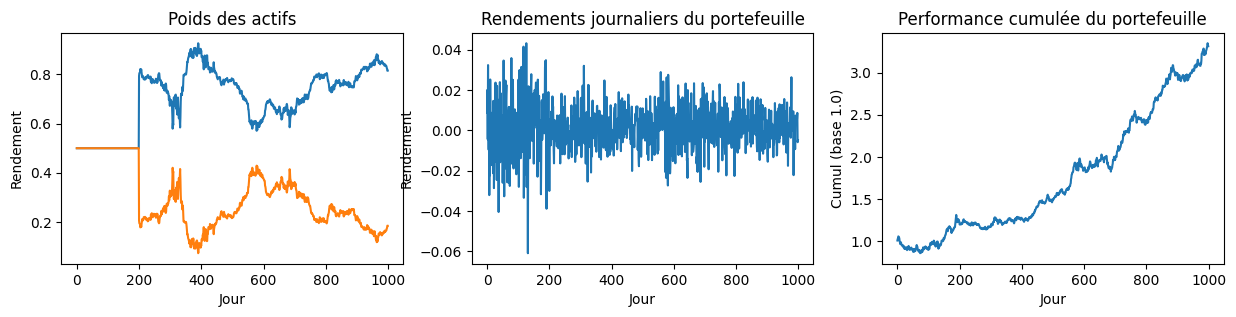

sharpe ratio 1.7685298344839315


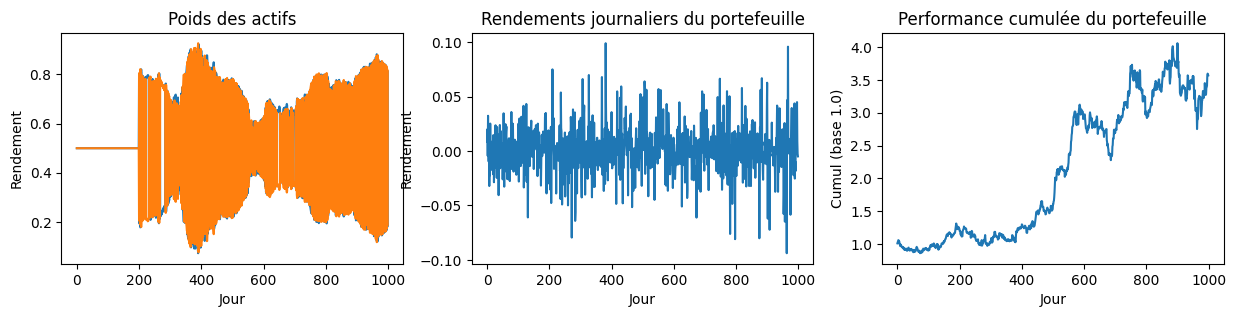

sharpe ratio 1.1163375857793207


np.float64(1.1163375857793207)

In [28]:
overlap = 1 
print(f"overlap : {overlap}")
print()
plot_portfolio_results(returns, batch_size=batch_size, overlap=overlap, max_sharpe=True, perm=False)
plot_portfolio_results(returns, batch_size=batch_size, overlap=overlap, max_sharpe=True, perm=True)

overlap : 10


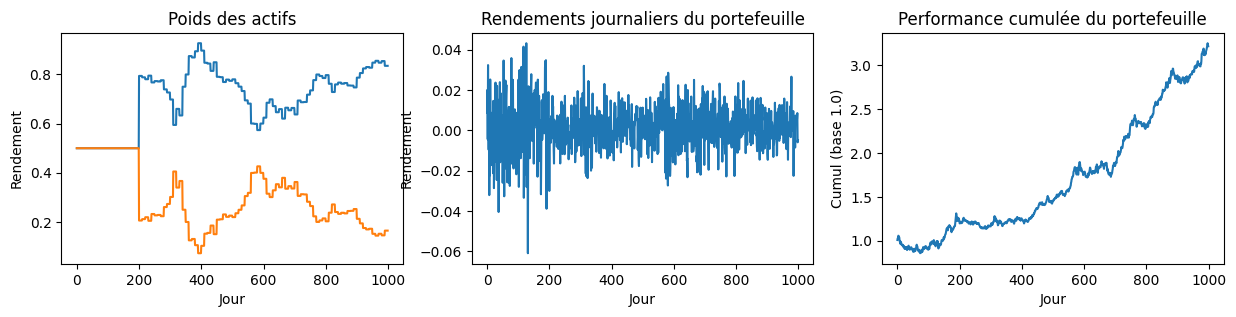

sharpe ratio 1.7262651723294524


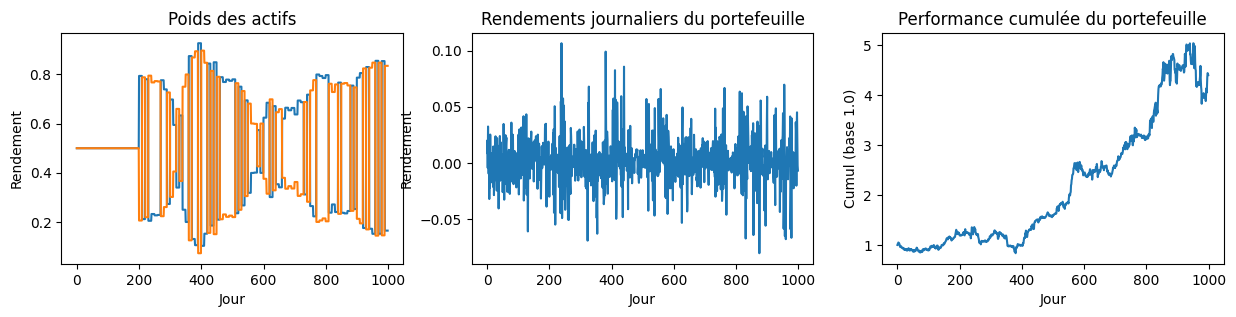

sharpe ratio 1.274464854994254


np.float64(1.274464854994254)

In [29]:
overlap = 10
print(f"overlap : {overlap}")
plot_portfolio_results(returns, batch_size=batch_size, overlap=overlap, max_sharpe=True, perm=False)
plot_portfolio_results(returns, batch_size=batch_size, overlap=overlap, max_sharpe=True, perm=True)

overlap : 50


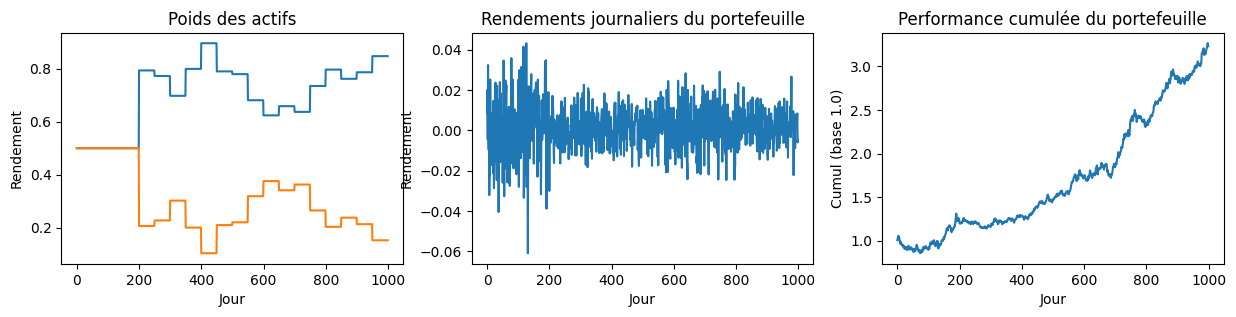

sharpe ratio 1.7508175654154046


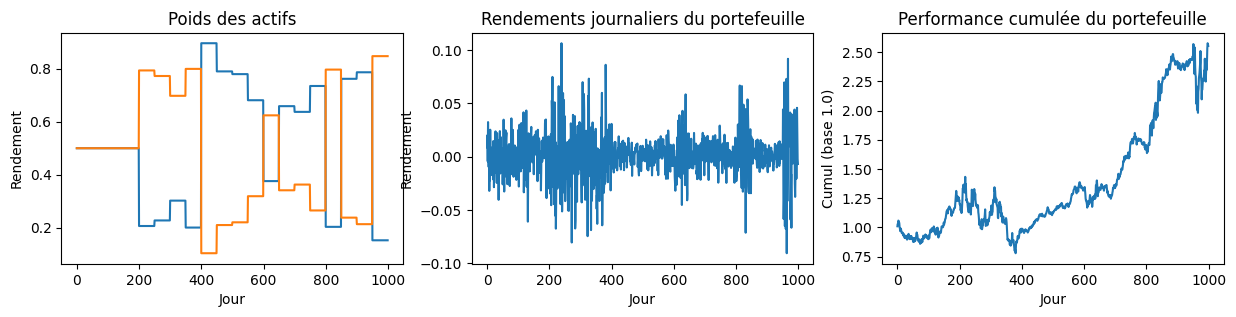

sharpe ratio 0.8742332198515873


np.float64(0.8742332198515873)

In [30]:
overlap = 50
print(f"overlap : {overlap}")
plot_portfolio_results(returns, batch_size=batch_size, overlap=overlap, max_sharpe=True, perm=False)
plot_portfolio_results(returns, batch_size=batch_size, overlap=overlap, max_sharpe=True, perm=True)

In [1]:
# HAHHA 